# Discussion - Homework 5

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## This notebook is for illustrative purposes
#### You will not be able to run it, as it relies on modules, `factor_pricing.py`, `forecasts.py`

In [2]:
import sys
sys.path.insert(0, '../cmds')
from portfolio import *
from factor_pricing import *
from forecasts import *

## Load Data

In [3]:
filepath_data = '../data/factor_pricing_data.xlsx'
info = pd.read_excel(filepath_data,sheet_name='descriptions')
info.rename(columns={'Unnamed: 0':'Symbol'},inplace=True)
info.set_index('Symbol',inplace=True)

facs = pd.read_excel(filepath_data,sheet_name='factors (excess returns)')
facs.set_index('Date',inplace=True)

rf = pd.read_excel(filepath_data,sheet_name='risk-free rate')
rf.set_index('Date',inplace=True)

# 2. The Factors

## 2.1 and 2.2 Univariate Performance

In [4]:
performanceMetrics(facs,annualization=12)

,Mean,Vol,Sharpe,Min,Max
MKT,0.0873,0.1554,0.5619,-0.2324,0.1365
SMB,0.0135,0.1010,0.1332,-0.1539,0.1838
HML,0.0229,0.1061,0.2157,-0.1402,0.1248
RMW,0.0425,0.0827,0.5135,-0.1876,0.1338
CMA,0.0296,0.0686,0.4314,-0.0678,0.0906
UMD,0.0646,0.1557,0.4150,-0.3430,0.1820


In [5]:
performanceMetrics(facs['2015':],annualization=12)

,Mean,Vol,Sharpe,Min,Max
MKT,0.1360,0.1519,0.8953,-0.1338,0.1365
SMB,-0.0007,0.1004,-0.0074,-0.0832,0.0704
HML,-0.0535,0.1206,-0.4437,-0.1402,0.0821
RMW,0.0240,0.0622,0.3868,-0.0362,0.0635
CMA,-0.0252,0.0612,-0.4117,-0.0325,0.0477
UMD,0.0150,0.1424,0.1055,-0.1245,0.1006


## 2.3 Correlation

MIN Correlation pair is ('RMW', 'SMB')
MAX Correlation pair is ('HML', 'CMA')


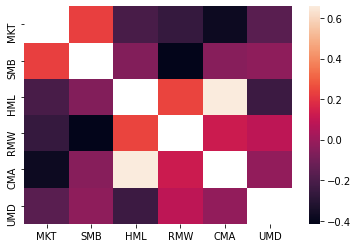

In [6]:
display_correlation(facs)

In [7]:
retsx = pd.read_excel(filepath_data,sheet_name='portfolios (excess returns)')
retsx.set_index('Date',inplace=True)

## 2.4 Tangency

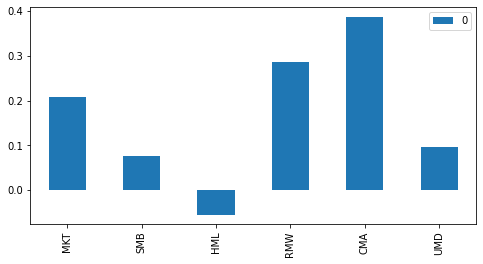

In [8]:
fig = plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,1,1)
tangency_weights(facs).plot.bar(ax=ax1);

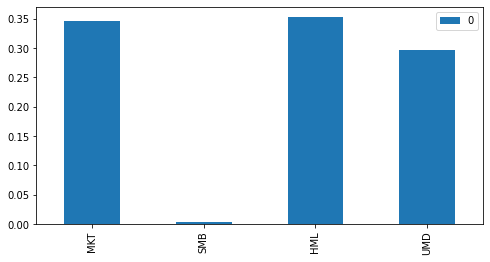

In [9]:
fig = plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,1,1)
tangency_weights(facs[['MKT','SMB','HML','UMD']]).plot.bar(ax=ax1);

# 3. Testing Modern Linear Pricing Models

## Models

In [10]:
models = dict()
models['CAPM'] = ['MKT']
models['FF3'] = ['MKT','SMB','HML']
models['AQR'] = ['MKT','HML','RMW','UMD']
models['FF5'] = ['MKT','SMB','HML','RMW','CMA']

## Testing Factor Pricing




CAPM: Factor Pricing



Time-Series Test Plots


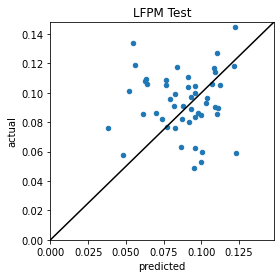

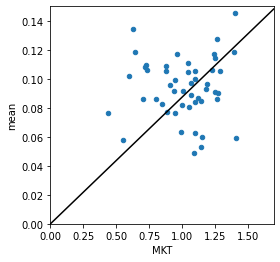

Cross-Sectional Test Plots


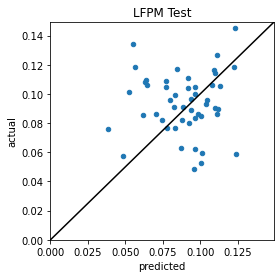

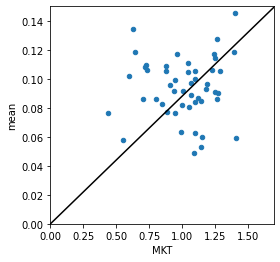


ESTIMATES


,premium-TS,premium-CS
MKT,0.0873,0.0879



MODEL FIT


,MAE-TS,MAE-CS
error,0.0220,0.0220



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
MKT,0.0003,0.0002
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas



FF3: Factor Pricing



Time-Series Test Plots


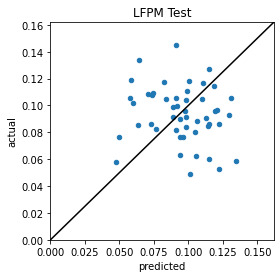

Cross-Sectional Test Plots


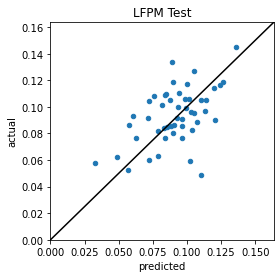


ESTIMATES


,premium-TS,premium-CS
MKT,0.0873,0.1046
SMB,0.0135,-0.0641
HML,0.0229,-0.0235



MODEL FIT


,MAE-TS,MAE-CS
error,0.0262,0.0159



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
MKT,0.0001,0.0002
SMB,0.9543,0.1948
HML,0.0293,0.0820
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas



AQR: Factor Pricing



Time-Series Test Plots


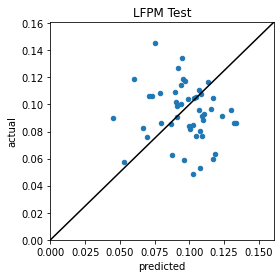

Cross-Sectional Test Plots


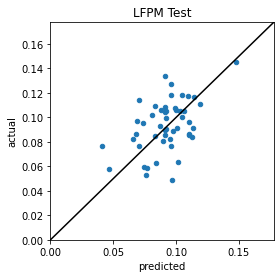


ESTIMATES


,premium-TS,premium-CS
MKT,0.0873,0.0871
HML,0.0229,-0.0535
RMW,0.0425,0.0499
UMD,0.0646,0.0178



MODEL FIT


,MAE-TS,MAE-CS
error,0.0242,0.0164



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
MKT,0.0000,0.0002
HML,0.0192,0.0820
RMW,0.0005,0.0005
UMD,0.0003,0.0038
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas



FF5: Factor Pricing



Time-Series Test Plots


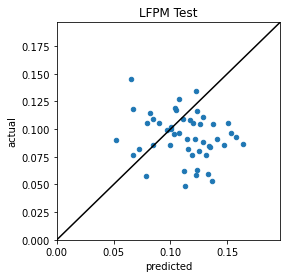

Cross-Sectional Test Plots


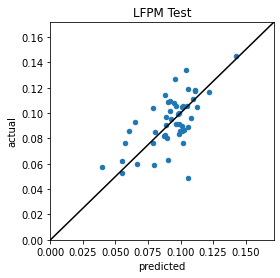


ESTIMATES


,premium-TS,premium-CS
MKT,0.0873,0.0977
SMB,0.0135,-0.0582
HML,0.0229,-0.0448
RMW,0.0425,0.0417
CMA,0.0296,-0.0292



MODEL FIT


,MAE-TS,MAE-CS
error,0.0332,0.0127



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
MKT,0.0000,0.0002
SMB,0.1150,0.1948
HML,0.0614,0.0820
RMW,0.0000,0.0005
CMA,0.0000,0.0028
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas


In [11]:
for model in models.keys():
    print(f'\n\n\n======================================================')
    print(f'{model}: Factor Pricing')
    print(f'======================================================\n\n\n')
    LFPtests(retsx,facs[models[model]],useIntCS=False,annualization=12)

## Comparing Models

In [12]:
mae = pd.DataFrame(columns=models.keys())
mae.index.name = 'MAE'

r2means = pd.DataFrame(columns=models.keys())
r2means.index.name = 'R-squared Means'

for model in models.keys():
    output = LFPts(retsx,facs[models[model]],annualization=12)
    mae.loc['Time-Series',model] = output['stats']['alpha'].mad()
    mae.loc['Cross-Section',model] = LFPcs(output['betas'],output['stats']['mean'],useInt=False)['errors'].mad()

    r2means.loc['Time-Series',model] = output['stats']['rsquared'].mean()
mae

,CAPM,FF3,AQR,FF5
MAE,,,,
Time-Series,0.0216,0.0261,0.0245,0.0302
Cross-Section,0.0217,0.0161,0.0163,0.0125


## Linear Factor Decompositions

We see that the time-series r-squared metrics of the assets average below 60% in all models. 

Notably, they do not increase much with the addition of factors beyond MKT.

Thus, while MKT is likely useful in an LFD of these assets, the other factors would not be very useful.

In [13]:
r2means

,CAPM,FF3,AQR,FF5
R-squared Means,,,,
Time-Series,0.5283,0.5725,0.5780,0.5986


# 4. Extensions

## 4.1 Cross-sectional Estimation
See above.
As expected, the cross-sectional estimation delivers lower MAE due to having extra flexibility in choosing the factor premia.

Even without including an intercept in the CS regression, we find that the factor premia differ substantially from the time-series averages of the factors in many cases. 

* MKT and RMW are similar to the time-series estimate. 

* SMB, HML, CMA all become negative in the CS estimation! This flexibility is what decreases the MAE substantially. 

* UMD is much lower in the CS estimation, though still positive.

## 4.2 Using LFP Models

In [14]:
window = 60
forecast = LFPfit_rolling(retsx,facs[models['AQR']],window=window).shift()
null = retsx.expanding(min_periods=window).mean().shift()

r2oos = oos_rsquared(retsx,forecast,null=null)
r2oos.describe()

count   49.0000
mean    -0.0027
std      0.0065
min     -0.0283
25%     -0.0057
50%     -0.0020
75%      0.0007
max      0.0133
dtype: float64

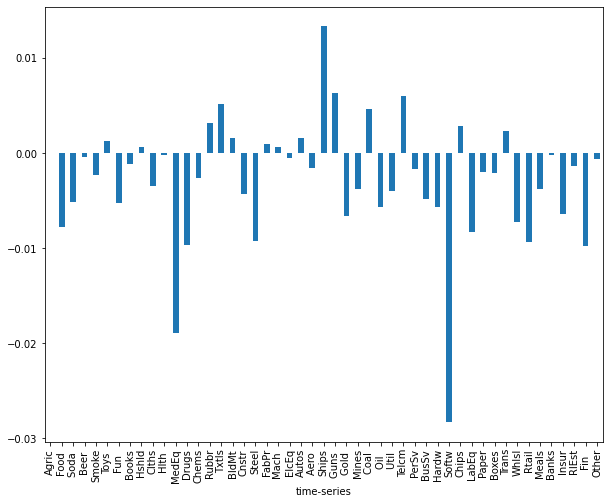

In [15]:
r2oos.plot.bar(figsize=(10,8));

### 4.2b

The model does a poor job of forecasting returns as seen by the moslty negative OOS r-squared. The OOS r-squared are all very close to 0.

In [16]:
print(f'\nMAX forecasting power for {r2oos.idxmax()}: {r2oos.max():0.2f}')
print(f'MIN forecasting power for {r2oos.idxmin()}: {r2oos.min():0.2f}\n')


MAX forecasting power for Ships: 0.01
MIN forecasting power for Softw: -0.03



### 4.3c

In [17]:
window_choices = [36,60,96]
R2oosWindows = pd.DataFrame(columns=window_choices)

for window in window_choices:
    null = retsx.expanding(min_periods=window).mean().shift()
    forecast = LFPfit_rolling(retsx,facs[models['AQR']],window=window).shift()
    r2oos = oos_rsquared(retsx,forecast,null=null)
    R2oosWindows[window] = r2oos.describe()

R2oosWindows

,36,60,96
count,49.0000,49.0000,49.0000
mean,-0.0017,-0.0027,-0.0019
std,0.0055,0.0065,0.0064
min,-0.0167,-0.0283,-0.0260
25%,-0.0048,-0.0057,-0.0041
50%,-0.0008,-0.0020,-0.0006
75%,0.0020,0.0007,0.0012
max,0.0098,0.0133,0.0099


### 4.2d

In [18]:
window = 60
null = retsx.expanding(min_periods=window).mean().shift()

R2oosModels = pd.DataFrame(columns=models.keys())
for model in models.keys():
    forecast = LFPfit_rolling(retsx,facs[models[model]],window=window).shift()
    r2oos = oos_rsquared(retsx,forecast,null=null)
    R2oosModels[model] = r2oos.describe()

R2oosModels

,CAPM,FF3,AQR,FF5
count,49.0000,49.0000,49.0000,49.0000
mean,0.0003,-0.0001,-0.0027,-0.0031
std,0.0040,0.0050,0.0065,0.0074
min,-0.0098,-0.0174,-0.0283,-0.0219
25%,-0.0018,-0.0019,-0.0057,-0.0076
50%,0.0008,0.0006,-0.0020,-0.0018
75%,0.0028,0.0028,0.0007,0.0021
max,0.0071,0.0094,0.0133,0.0123


### Results

We see that the forecasting power is not good for any of the three windows.

Furthermore, it is not strong for any of the models, though the CAPM performs best!

Note that this does not prove these models do not work, but it illustrates that they do not work well for these assets, at least when using their time-series-estimated premia.